In [ ]:
# Hypotheses for Investigation:

# There might be a difference in the number of cab users between the two companies.
# There could be seasonality in the number of customers using the cab service, with potentially higher usage during holidays or weekends.
# There are distinct customer segments based on demographics, payment modes, and transaction frequency.

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [190]:
# Load the dataset
df = pd.read_csv("Cab_Data.csv")
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [191]:
# Calculate profit for each transaction
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

In [192]:
# Group data by company and calculate total profit for each
Company_Profit = df.groupby('Company')['Profit'].sum()

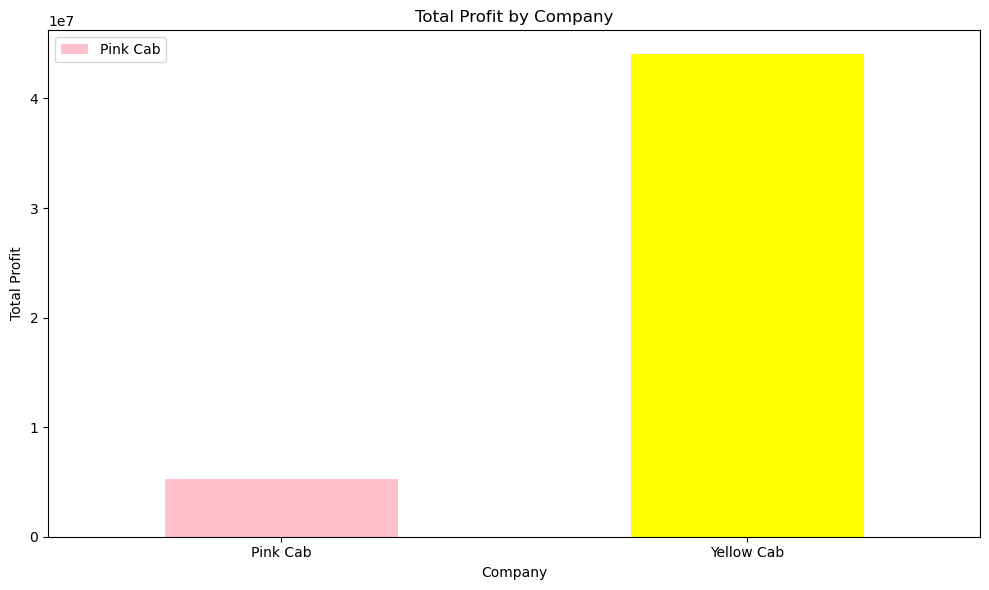

In [193]:
# Display the plot
plt.figure(figsize=(10, 6))
Company_Profit.plot(kind='bar', color=['pink', 'yellow'])
plt.title('Total Profit by Company')
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.tight_layout()
plt.show()

In [194]:
# Calculate the number of rides for each company
Rides = df.groupby('Company')['Transaction ID'].count()

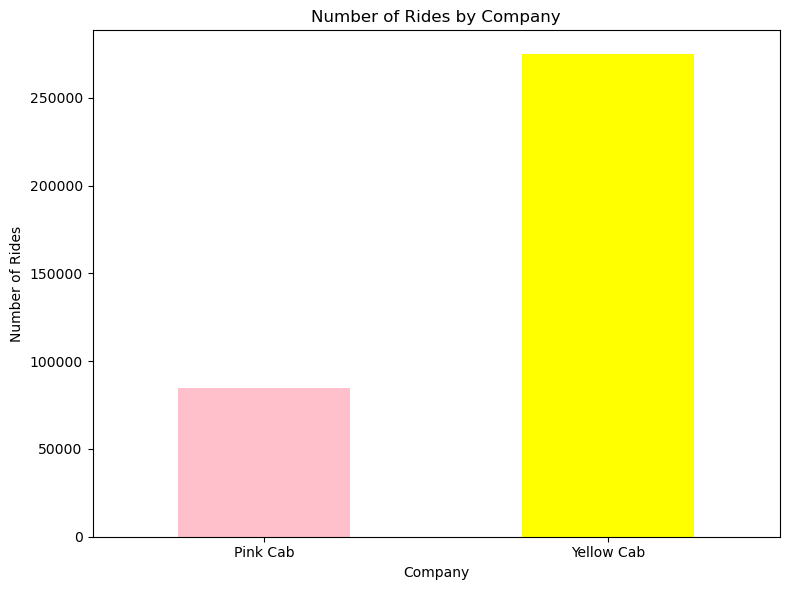

In [195]:
# Plotting
plt.figure(figsize=(8, 6))
Rides.plot(kind='bar', color=['pink', 'yellow'])
plt.title('Number of Rides by Company')
plt.xlabel('Company')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [196]:
# Convert 'Date of Travel' to datetime
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
# Extract year from 'Date of Travel'
df['Year'] = df['Date of Travel'].dt.year

/var/folders/t9/7_lb14s133756jk9pr2g68000000gn/T/ipykernel_35270/3257268456.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])


In [197]:
# Group data by company and year, and calculate total profit for each
Yearly_Profit = df.groupby(['Company', 'Year'])['Profit'].sum().reset_index()

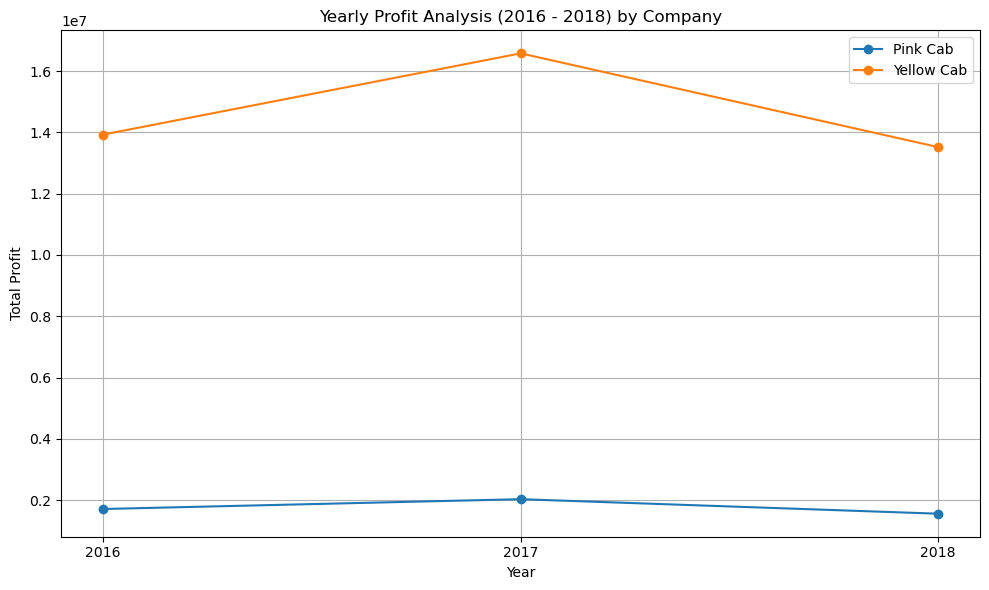

In [198]:
# Plotting
plt.figure(figsize=(10, 6))

for Company in ['Pink Cab', 'Yellow Cab']:
    Company_Data = Yearly_Profit[Yearly_Profit['Company'] == Company]
    plt.plot(Company_Data['Year'], Company_Data['Profit'], marker='o', label=Company)

plt.title('Yearly Profit Analysis (2016 - 2018) by Company')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks([2016, 2017, 2018])
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [199]:
# Group data by company and city, and calculate the number of rides for each
rides_by_company_city = df.groupby(['Company', 'City'])['Transaction ID'].count().reset_index()

In [200]:
# Pivot the data for plotting
pivot_data = rides_by_company_city.pivot(index='City', columns='Company', values='Transaction ID')

<Figure size 1000x600 with 0 Axes>

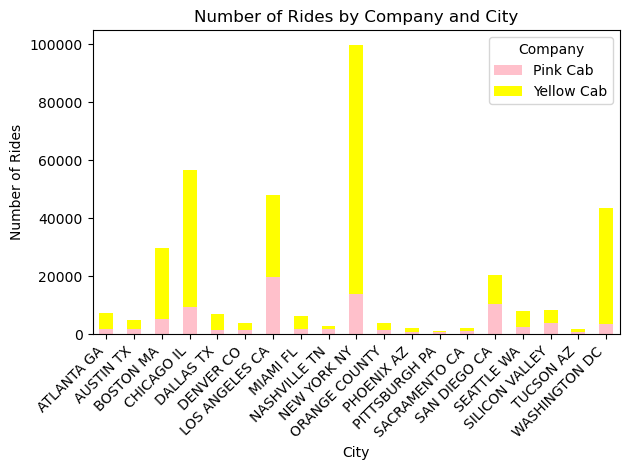

In [201]:
# Plotting
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', color = ['pink', 'yellow'], stacked=True)
plt.title('Number of Rides by Company and City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Company')
plt.tight_layout()

# Display the plot
plt.show()

In [202]:
# Load the US holiday data (assuming 'US_Holidays.csv' is the file name)
us_holidays = pd.read_csv('US Holiday Dates (2016-2018).csv')

In [203]:
# Convert 'Date of Travel' to datetime
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
# Extract date from 'Date of Travel'
df['Date'] = df['Date of Travel'].dt.date

In [204]:
# Mark holidays in the cab data
df['Is_Holiday'] = df['Date of Travel'].isin(us_holidays['Date'])

/var/folders/t9/7_lb14s133756jk9pr2g68000000gn/T/ipykernel_35270/4107865310.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Is_Holiday'] = df['Date of Travel'].isin(us_holidays['Date'])


In [205]:
# Calculate the number of rides on holidays and regular days
rides_by_day_type = df.groupby('Is_Holiday')['Transaction ID'].count()

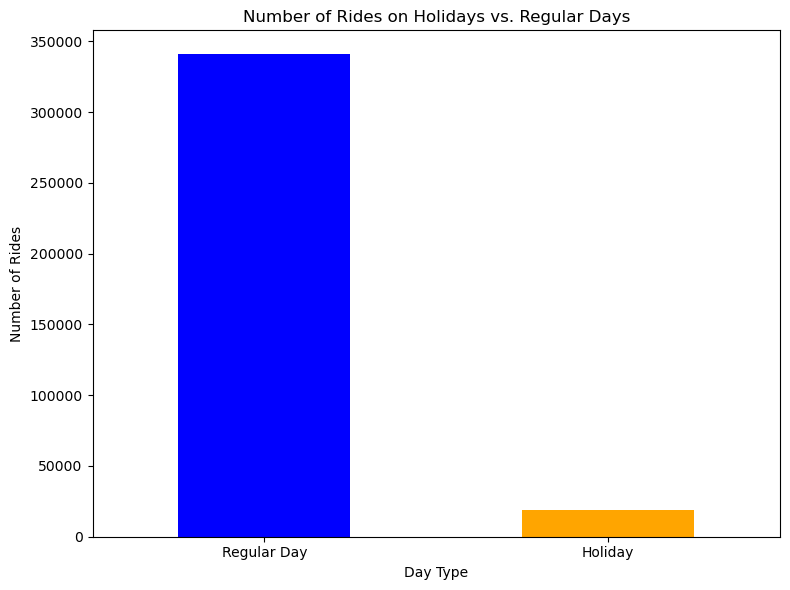

In [206]:
# Plotting
plt.figure(figsize=(8, 6))
rides_by_day_type.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Rides on Holidays vs. Regular Days')
plt.xlabel('Day Type')
plt.ylabel('Number of Rides')
plt.xticks(np.arange(2), ['Regular Day', 'Holiday'], rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [215]:
transaction_data = pd.read_csv("Transaction_ID.csv")
customer_data = pd.read_csv("Customer_ID.csv")

# Merge data1 and data2 based on a common column
merged_data = df.merge(transaction_data, on='Transaction ID')

# Merge the merged_data with data3 based on another common column
final_merged_data = merged_data.merge(customer_data, on='Customer ID')

final_merged_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Year,Date,Is_Holiday,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,2016-08-01,False,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,2018,2018-07-21,False,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,2018,2018-11-23,False,29290,Card,Male,28,10813
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,2016-06-01,False,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,2018,2018-04-21,False,27703,Card,Male,27,9237


In [216]:
# Group data by company and age, and calculate the number of users for each
users_by_age = final_merged_data.groupby(['Company', 'Age'])['Customer ID'].nunique().reset_index()

In [217]:
# Separate data for each company
company_a_data = users_by_age[users_by_age['Company'] == 'Pink Cab']
company_b_data = users_by_age[users_by_age['Company'] == 'Yellow Cab']

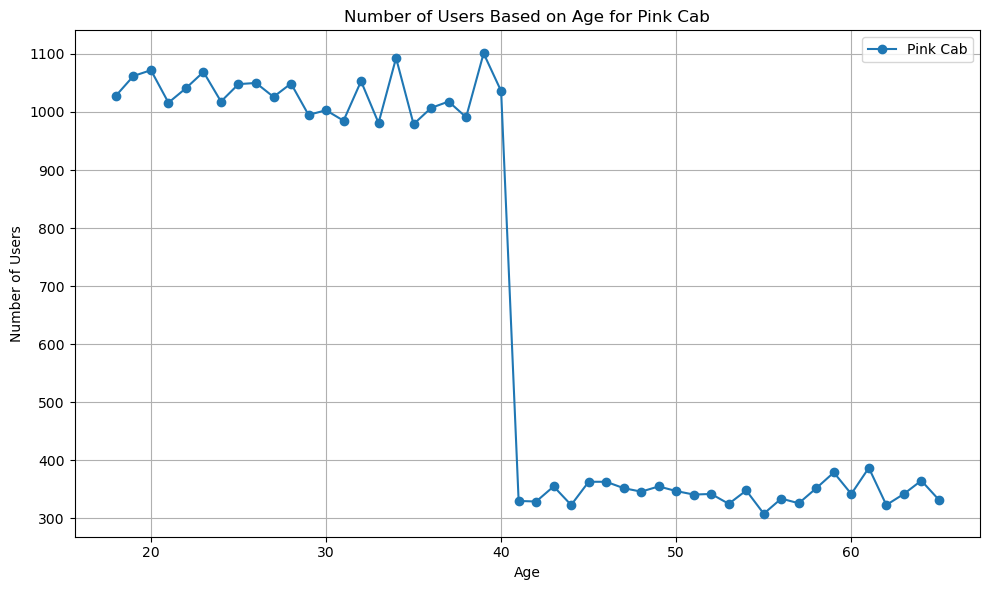

In [218]:
# Plotting for Pink Cab
plt.figure(figsize=(10, 6))
plt.plot(company_a_data['Age'], company_a_data['Customer ID'], marker='o', label='Pink Cab')
plt.title('Number of Users Based on Age for Pink Cab')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot for Company A
plt.show()

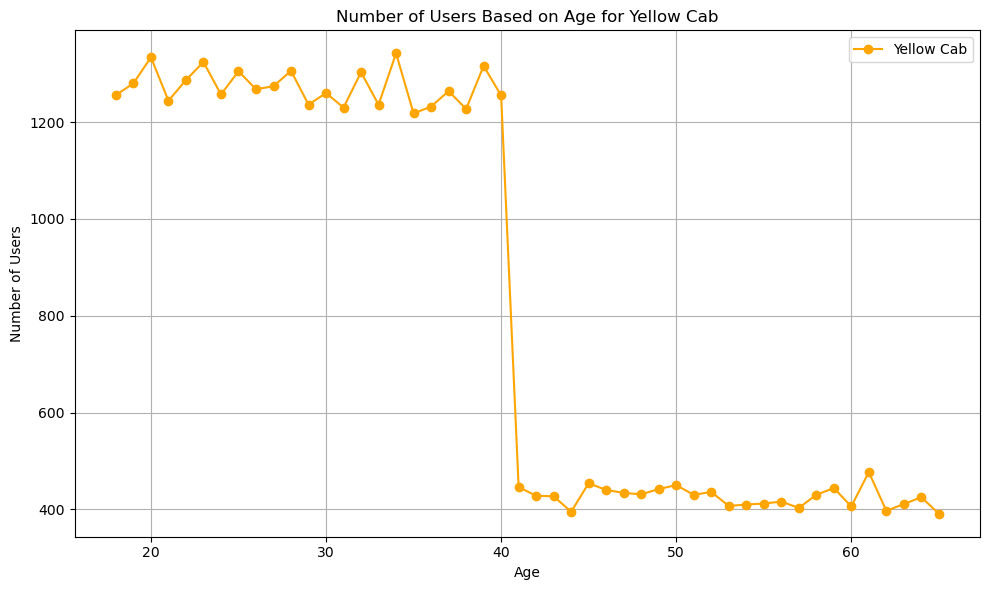

In [219]:
# Plotting for Yellow Cab
plt.figure(figsize=(10, 6))
plt.plot(company_b_data['Age'], company_b_data['Customer ID'], marker='o', color='orange', label='Yellow Cab')
plt.title('Number of Users Based on Age for Yellow Cab')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot for Company B
plt.show()

In [222]:
# Group data by company and gender, and calculate the number of users for each
users_by_gender = final_merged_data.groupby(['Company', 'Gender'])['Customer ID'].nunique().reset_index()

In [223]:
# Separate data for each company
company_a_data = users_by_gender[users_by_gender['Company'] == 'Pink Cab']
company_b_data = users_by_gender[users_by_gender['Company'] == 'Yellow Cab']

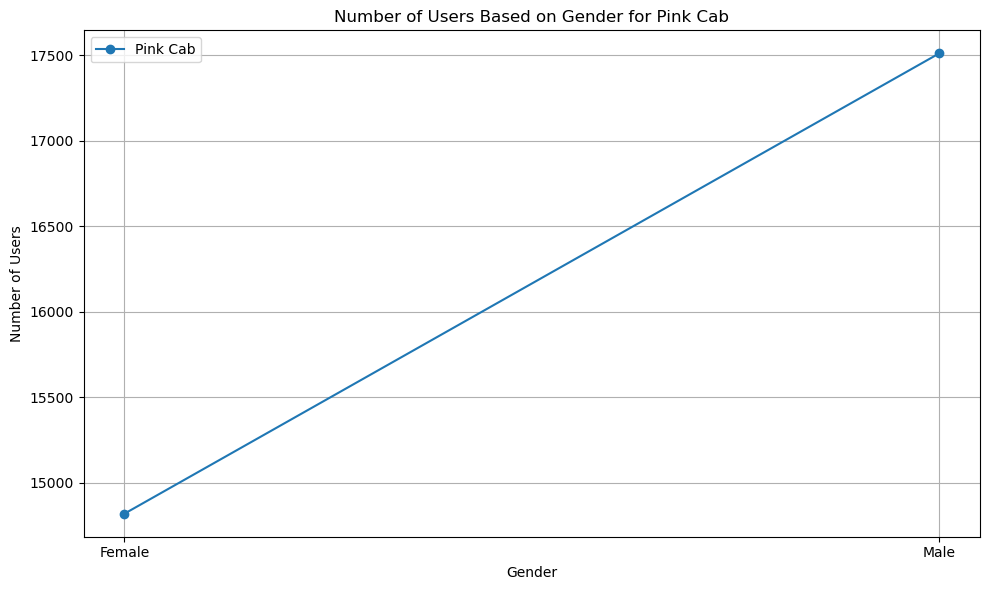

In [224]:
# Plotting for Pink Cab
plt.figure(figsize=(10, 6))
plt.plot(company_a_data['Gender'], company_a_data['Customer ID'], marker='o', label='Pink Cab')
plt.title('Number of Users Based on Gender for Pink Cab')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot for Pink Cab
plt.show()

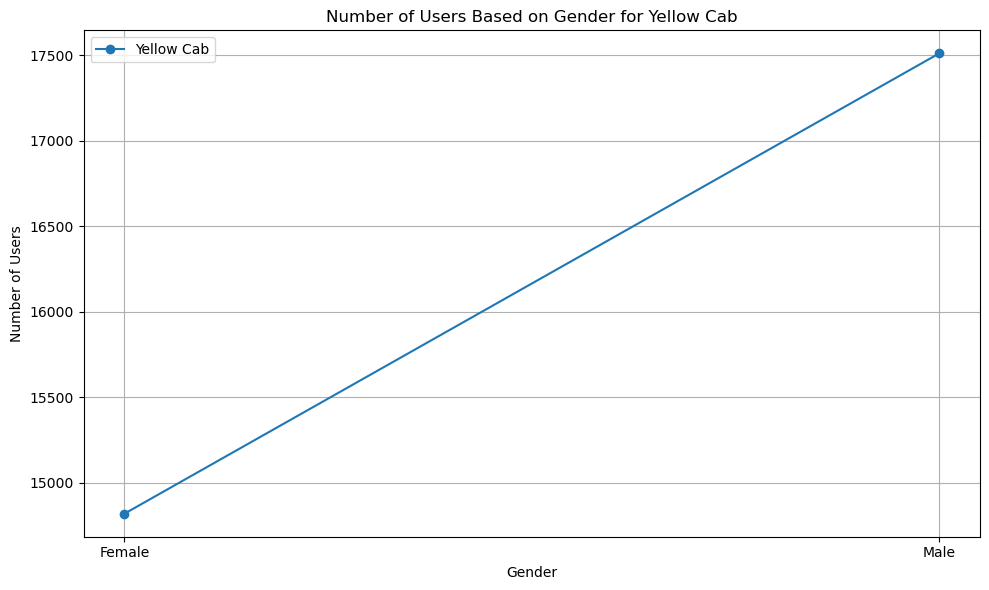

In [225]:
# Plotting for Yellow Cab
plt.figure(figsize=(10, 6))
plt.plot(company_a_data['Gender'], company_a_data['Customer ID'], marker='o', label='Yellow Cab')
plt.title('Number of Users Based on Gender for Yellow Cab')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot for Yellow Cab
plt.show()

In [ ]:
# Recommendation is to invest in Yellow Cab Company.